In [ ]:
# Connect google drive to google colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install highlight_text

In [ ]:
# Incluya aquí todas las librería que utilice para el desarrollo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

from matplotlib import cm
import matplotlib.cbook as cbook
import matplotlib.colors as colors
import matplotlib.patches as patches
from highlight_text import fig_text

import pandas as pd
import geopandas as gpd

In [ ]:
# Incluya aquí todas las librerías que necesite instalar adicionales
#!pip install xxxxx

In [ ]:
main_datasets_path = '/content/drive/MyDrive/AVD/Trabajos_1_2/Datasets/'

# 1. Análisis exploratorio de dataset de características de Spotify
En este primer apartado se le proporciona el dataset "SpotifyDataset.csv" el cual contiene numerosas canciones de las que se proprociona el nombre y una serie de características previamente extraídas. Se propone realizar un extenso análisis exploratorio de datos que permita entender y relacionar todas estas características. Se proporciona además en el dataset un valor que representa la popularidad de la canción medida con una métrica que se propone por parte de Spotify. Se pide analizar si existen realaciones entre la popularidad de una canción y otras de las características existentes. Esta parte es de total libertad para el alumnos por tanto los pasos que deberían seguirse son los siguientes:

- Análisis general de las características para entender cada una de ellas.
- Análisis combinatorio de características, correlaciones, relaciones entre ellas.
- Proponga una serie de preguntas que pueda responder mediante el análisis exploratorio. Debe proproner al menos 5 preguntas e intentar resolver y mostrarlas (visualizarlas) con cualquier gráfico adecuado. Comente en detalle sus análisis y respuestas.
- Introduzca alguna visualización interactiva (con plotly por ejemplo) que ayude al entendimiento global de los datos para alguien que no los ha analizado (al menos dos visualizaciones que considere interesantes e incoporen diferente información).

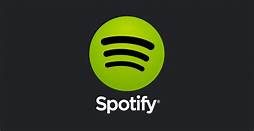

Para entender las características proprocionadas debe visitar: https://developer.spotify.com/community

The summarize for the features is:

- acousticness: number [float]. A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

- danceability: number [float]. Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

- duration_ms: integer. The duration of the track in milliseconds.

- energy: number [float]. Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

- track_id: string. The Spotify ID for the track.

- instrumentalness: number [float]. Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

- key: integer. The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. Range: -1 - 11.

- liveness: number [float]. Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

- loudness: number [float]. The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

- mode: integer. Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

- speechiness: number [float]. Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

- tempo: number [float]. The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

- time_signature: integer. An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

- track_hreftstring: string. A link to the Web API endpoint providing full details of the track.

- valence: number [float]. A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

# **1. Análisis general de características**

Comenzaremos cargando los datos y observando las primeras filas para entender mejor las características.

In [ ]:
path_dataset = main_datasets_path+"SpotifyDataset.csv"
df = pd.read_csv(path_dataset)
df.head()

In [ ]:
df.columns

Primero vamos a analizar cuáles son categóricos y cuáles son númericos

In [ ]:
# Estadísticas descriptivas de las características numéricas
print(df.info())


float64(9): acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence

int64(5): duration_ms, key, mode, time_signature, popularity

object(3): artist_name, track_id, track_name

<a id = "3"></a><br>
# Análisis univariado de variables
* Variables categóricas: artist_name, track_id, track_name
* Variables numéricas: acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, duration_ms, key, mode, time_signature, popularity

Al analizar el conjunto de datos, observamos una estructura que se compone de tres variables categóricas y catorce variables numéricas

In [ ]:
df.describe()

Ahora vamos a analizar los detalles más representativos de cada una de las características:

- **acousticness** (acústico): Observamos como el nivel de acústica en la mayoría de las canciones es relativamente bajo (mean = 0.342500), teniendo en cuenta que el más alto observado es 0.996000.

- **danceability** (bailable): La mayoría de las canciones son bailables (mean = 0.581468) con respecto al valor más alto observado que es 0.99600.

- **duration_ms** (duración en ms): La media de duración de las canciones es aproximadamente de 3 minutos lo cual encaja con el valor que esperábamos.

- **energy** (energía): Vemos que la mayoría de las canciones son muy enérgicas y observamos que algunas canciones tienen el nivel de energía al máximo (max = 1.0000)

- **instrumentalness** (instrumentalidad): En este caso vemos que no se utilizan muchos instrumentos en la mayoría de las canciones (mean = 0.224018) pero al igual que pasaba con la energía, algunas canciones tienen el nivel de instrumentalidad al máximo.

- **key** (tonalidad): El nivel de tonalidad es relativamente normal

- **liveness** (en vivo): Observamos que muy pocas canciones fueron realizadas en vivo durante una presentación en directo, lo cual nos parece normal ya que la mayoría de canciones se suelen grabar en un estudio o cabina de música.

- **loudness** (intensidad): El valor medio de -9.9 dB nos indica un nivel moderado de volumen o intensidad, pero aún así está por debajo del nivel de referencia (0 dB) en la mayoría de las canciones.

- **mode** (moda): El "mode" puede tomar diferentes valores, dependiendo de la escala musical utilizada en una composición determinada. En el análisis de datos musicales, el "mode" se puede representar numéricamente, con valores como 0 para el modo menor y 1 para el modo mayor, por lo que vemos que la mayoría estan en un modo mayor.

- **speechiness** (discurso): Existe muy poco discurso en las canciones por lo general (mean = 0.112015)

- **tempo** (ritmo): Vemos que el ritmo suele ser relativamente lento con respecto al máximo alcanzado en alguna canción (mean = 119.47 VS max = 249.98)

- **time_signature** (organización rítmica): Es relativamente alta en la mayoría de las canciones.

- **valence** (positividad o negatividad): Es una característica que describe la positividad o negatividad percibida de una pieza musical, y por tanto observamos que no hay unanimidad entre unas y otras normalmente.

- **popularity** (popularidad): Vemos que los artistas no son muy reconocidos (mean = 24.2) aunque si que hay alguno que otro que tiene mucha popularidad (max = 1.0000)

<a id = "4"></a><br>
## Variables categóricas

In [ ]:
def bar_plot(variable):
    """
        input: variable an: "artist_name"
        output: bar plot & value count
    """
    # get feature
    var = df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts().head(10)

    # visualize
    plt.figure(figsize = (9,5))
    plt.barh(varValue.index, varValue.values)
    # plt.xticks(varValue.index, varValue.index.values)
    # plt.ylabel("Frecuencia")
    # plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))


In [ ]:
category = df.select_dtypes(include='object')
for c in category:
    bar_plot(c)

Para el ánalisis de cada una de las variables categóricas, hemos utilizado un gráfico de barras horizontal y hemos seleccionado los 10 valores que mas aparecen en cada una de las categorías:

**ARTIST_NAME**

Observamos que el artista que más aparece es Johann Sebastian Bach y el segundo Amadeus Mozart. Los demás artistas también están relacionados con la música clásica y gracias a esto entendemos algunos valores de las características como la popularidad , ya que aunque haya algunos muy conocidos, la mayoría de ellos no son muy reconocidos.

**TRACK_ID**

Vemos que "Intro" es el título de la canción que más se repite para diferentes artistas y otros como "Home", "Stay", "Perfect" también se repiten pero algo menos. Este resultado nos parece lógico ya que son títulos que observamos normalmente en las canciones que consumimos.

**TRACK_NAME**

Como hemos mencionado anteriormente, "Intro" es el título que más se repite con diferencia, por lo que tras informarnos a través de internet, hemos descubierto el motivo:

"En muchas composiciones clásicas, especialmente en obras más largas como sinfonías, conciertos o sonatas, se incluye una sección inicial que sirve como introducción a la pieza principal"




In [ ]:
# Count null values in each column
null_counts = df.isna().sum()

# Count blank values in each column
blank_counts = (df == '').sum()

print("\nNull Value Counts:")
print(null_counts)

print("\nBlank Value Counts:")
print(blank_counts)

print("\nNo existen valores nulos dentro del dataset")

# **2. Análisis combinatorio de características**

Para explorar las relaciones entre las características y la popularidad, normalizamos el dataset para facilitar la comparación entre variables ajustanlandolas a una escala común. Además con esto conseguimos reducir el impacto de valores atípicos, preparamos los datos para algunos algortimos como PCA y mejoramos la visualización.

La única variable que no hemos normalizado es la de "duration_ms" ya que posteriormente necesitamos esa variable con sus valores originales para poder comprararla con la popularidad



In [ ]:
df['popularity'] = (df['popularity'] - df['popularity'].min())/(df['popularity'].max()-df['popularity'].min())
df['loudness'] = (df['loudness'] - df['loudness'].min())/(df['loudness'].max()-df['loudness'].min())
df['key'] = (df['key'] - df['key'].min())/(df['key'].max()-df['key'].min())
df['duration_ms_norm'] = (df['duration_ms'] - df['duration_ms'].min())/(df['duration_ms'].max()-df['duration_ms'].min())
df['energy'] = (df['energy'] - df['energy'].min())/(df['energy'].max()-df['energy'].min())
df['liveness'] = (df['liveness'] - df['liveness'].min())/(df['liveness'].max()-df['liveness'].min())
df['acousticness'] = (df['acousticness'] - df['acousticness'].min())/(df['acousticness'].max()-df['acousticness'].min())
df['instrumentalness'] = (df['instrumentalness'] - df['instrumentalness'].min())/(df['instrumentalness'].max()-df['instrumentalness'].min())
df['mode'] = (df['mode'] - df['mode'].min())/(df['mode'].max()-df['mode'].min())
df['tempo'] = (df['tempo'] - df['tempo'].min())/(df['tempo'].max()-df['tempo'].min())
df['time_signature'] = (df['time_signature'] - df['time_signature'].min())/(df['time_signature'].max()-df['time_signature'].min())
df['valence'] = (df['valence'] - df['valence'].min())/(df['valence'].max()-df['valence'].min())
df['energy'] = (df['energy'] - df['energy'].min())/(df['energy'].max()-df['energy'].min())
df['danceability'] = (df['danceability'] - df['danceability'].min())/(df['danceability'].max()-df['danceability'].min())
df['speechiness'] = (df['speechiness'] - df['speechiness'].min())/(df['speechiness'].max()-df['speechiness'].min())


In [ ]:
df.describe()

In [ ]:
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

Al observar las distribuciones de todas las características, podemos identificar patrones interesantes en los datos:

  -Acousticness: La distribución es bimodal, con picos en 0 y 1. Esto sugiere que hay dos grupos de canciones: las que son muy acústicas y las que no lo son.

  -Danceability: La distribución es unimodal, con un pico en 0.5. Esto sugiere que la mayoría de las canciones tienen un nivel de baile medio.

  -Duration_ms: Nos sugiere que la mayoría de las canciones duran alrededor de 3 minutos.

  -Energy: La distribución es unimodal, con un pico en 0.5. Esto sugiere que la mayoría de las canciones tienen un nivel de energía medio.

  -Instrumentalness: La distribución es bimodal, con picos en 0 y 1. Esto sugiere que hay dos grupos de canciones: las que son completamente instrumentales y las que tienen voz.

  -Key: La distribución es uniforme, con una probabilidad similar para cada una de las 12 teclas. Esto sugiere que no hay una preferencia particular por ninguna tecla.

  -Liveness: Nos sugiere que la mayoría de las canciones tienen un nivel de "liveness" bajo.

  -Loudness: Nos sugiere que la mayoría de las canciones tienen un nivel de volumen medio.

  -Mode: Nos sugiere que solo hay canciones en modo mayor y en modo menor.

  -Speechiness: Vemos que no se suele hablar mucho en la mayoría de las canciones.

  -Tempo: La distribución es unimodal, con un pico alrededor de 120 BPM. Esto sugiere que la mayoría de las canciones tienen un tempo medio.

  -Time signature: La distribución es unimodal, con un pico en 4/4. Esto sugiere que la mayoría de las canciones están en compás de 4/4.

  -Valence: La distribución es unimodal, con un pico en 0.5. Esto sugiere que la mayoría de las canciones tienen una valencia neutral.

  -Popularity: La distribución es altamente sesgada a la derecha, con la mayoría de las canciones con una popularidad baja y unas pocas canciones con una popularidad muy alta.

  -Duration_ms_norm: La distribución es unimodal, con un pico en 0.5. Esto sugiere que la mayoría de las canciones tienen una duración normalizada media.

Esta matriz nos ayuda a entender cuales son las caracteristicas que mas se relacionan entre ellas.

In [ ]:

# Eliminar las columnas 'artist_name', 'track_id', y 'track_name'
df_numeric = df.drop(['artist_name', 'track_id', 'track_name'], axis=1)

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre características')
plt.show()


Ahora vamos a explorar la relación entre las variables mediante gráficas de regresión, centrándonos en aquellas que parecen tener una relación más notable, ya sea positiva o negativa. Al seleccionar estas variables, buscamos comprender cómo interactúan entre sí y cómo pueden influir en los resultados de nuestro análisis. Además, también consideraremos algunas características que parecen no tener una relación significativa entre sí, lo que nos servirá como ejemplo para contrastar con las relaciones más destacadas que estamos investigando.

In [ ]:
# Supongamos que tienes un DataFrame llamado df que contiene tus datos

# Crear una figura y un eje
fig, ax = plt.subplots()

# Graficar la dispersión de los datos
ax.scatter(df['loudness'], df['popularity'], alpha=0.9, s=0.1)

# Personalizar la gráfica
ax.set_xlabel('Loudness')
ax.set_ylabel('Popularity')
ax.set_title('Scatter Plot of Popularity vs Loudness')

# Mostrar la gráfica
plt.show()

# Scatter Plot 1: Acousticness vs. Loudness
plt.figure(figsize=(8, 6))
plt.scatter(df['acousticness'], df['loudness'], alpha=0.9, s=0.1)
plt.xlabel('Acousticness')
plt.ylabel('Loudness')
plt.title('Scatter Plot of Acousticness vs. Loudness')
plt.show()

# Scatter Plot 3: Loudness vs. Energy
plt.figure(figsize=(8, 6))
plt.scatter(df['loudness'], df['energy'], alpha=0.9, s=0.1)
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.title('Scatter Plot of Loudness vs. Energy')
plt.show()

# Scatter Plot: Acousticness vs. Energy
plt.figure(figsize=(8, 6))
plt.scatter(df['acousticness'], df['energy'], alpha=0.9, s=0.1)
plt.xlabel('Acousticness')
plt.ylabel('Energy')
plt.title('Scatter Plot of Acousticness vs. Energy')
plt.show

# Scatter Plot: Energy vs. Popularity
plt.figure(figsize=(8, 6))
plt.scatter(df['energy'], df['popularity'], alpha=0.9, s=0.1)
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.title('Scatter Plot of Energy vs. Popularity')
plt.show()

# Scatter Plot: Key vs. Tempo
plt.figure(figsize=(8, 6))
plt.scatter(df['key'], df['tempo'], alpha=0.9, s=0.1)
plt.xlabel('Key')
plt.ylabel('Tempo')
plt.title('Scatter Plot of Key vs Tempo')
plt.show()



**Popularity vs Loudness**(Tendencia ligeramente ascendente a partir de la mitad del gráfico):

Esta tendencia sugiere que, en general, hay una relación positiva entre la popularidad de una canción y su loudness, especialmente para canciones con loudness más altos. Esto podría indicar que las canciones más populares tienden a ser más fuertes en términos de volumen, lo que podría ayudarlas a destacar más y captar la atención de los oyentes en entornos ruidosos, como clubes o eventos en vivo.

**Acousticness vs Loudness** (Tendencia hacia abajo):

La tendencia hacia abajo en la relación entre acousticness y loudness sugiere que las canciones más acústicas tienden a tener niveles más bajos de loudness. Esto tiene sentido, ya que las canciones acústicas tienden a ser más suaves y menos fuertes en comparación con las canciones producidas electrónicamente. Las canciones acústicas suelen ser más delicadas y tienen menos elementos sonoros "ruidosos" en su producción.

**Loudness vs Energy** (Claramente hacia arriba):

Una tendencia claramente ascendente entre loudness y energy indica que las canciones más energéticas tienden a tener niveles más altos de loudness. Esto tiene sentido, ya que las canciones energéticas suelen ser más intensas y poderosas en términos de sonido. La alta energía musical se asocia comúnmente con un sonido más fuerte y dinámico, lo que se refleja en niveles más altos de loudness.

**Acousticness vs Energy** (Hacia abajo):

La tendencia hacia abajo en la relación entre acousticness y energy sugiere que las canciones más acústicas tienden a tener niveles más bajos de energía. Esto podría ser debido a que las canciones acústicas suelen ser más suaves y relajadas en comparación con las canciones más enérgicas, que suelen tener ritmos más rápidos y fuertes.

**Energy vs Popularity** (Sin relación aparente):

La falta de una relación clara entre energy y popularity indica que la popularidad de una canción no está necesariamente relacionada con su nivel de energía. Esto sugiere que hay otros factores que influyen en la popularidad de una canción, como la calidad de la composición, la letra, la promoción, etc. La energía de una canción puede ser importante para ciertos géneros o audiencias específicas, pero no necesariamente determinante para su popularidad general.

**Ke** (Sin relación aparente):
La relación entre las variables 'key' y 'tempo' no muestra una asociación significativa. Esto significa que el tono en el que está escrita una canción (representado por la variable 'key') no parece influir en el tempo de la misma. En otras palabras, el tempo de una canción no varía de manera sistemática dependiendo de la tonalidad en la que está compuesta.

# **3. Preguntas a responder:**

Cada una de estas preguntas representa un aspecto distinto de la música y su impacto en la popularidad, y analizarlas nos permite obtener información valiosa sobre cómo estas características se relacionan entre sí y con la métrica de popularidad.

1. ¿Cuáles son los artistas con las canciones de mayor y menor duración?

2. ¿Qué relación hay entre la duración de una canción y su popularidad?

3. ¿Cuáles son los artistas con mayor número de canciones bailables?

4. ¿Cuáles son los artistas que tienen más energía y son menos famosos?

5. ¿Cuáles son las canciones más populares en las que más se habla?


# **¿Cuáles son los artistas con las canciones de mayor y menor duración?**

In [ ]:
# Calcular la duración promedio de las canciones de cada artista
artist_duration_mean = df.groupby('artist_name')['duration_ms'].mean()

# Ordenar los artistas por duración promedio
top_artists_longest = artist_duration_mean.nlargest(10)  # Los 10 artistas con canciones de mayor duración
top_artists_shortest = artist_duration_mean.nsmallest(10)  # Los 10 artistas con canciones de menor duración

# Graficar los resultados
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
top_artists_longest.plot(kind='bar', color='skyblue')
plt.title('Top 10 Artistas con Canciones de Mayor Duración Promedio')
plt.xlabel('Artista')
plt.ylabel('Duración Promedio (ms)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.subplot(1, 2, 2)
top_artists_shortest.plot(kind='bar', color='salmon')
plt.title('Top 10 Artistas con Canciones de Menor Duración Promedio')
plt.xlabel('Artista')
plt.ylabel('Duración Promedio (ms)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()




El gráfico muestra que las canciones clásicas y de rock son más largas (más de 4 minutos) que las de pop, urbano o electrónica (menos de 3 minutos). Esto tiene sentido porque las clásicas y rock suelen ser más complejas, mientras que las otras buscan ser pegadizas y fáciles de escuchar.

Pero ojo, hay excepciones: hay canciones pop largas y rock cortas.

Lo importante es que la canción sea buena, no su duración. El gráfico invita a pensar por qué las canciones duran lo que duran y cómo ha cambiado esto con el tiempo.

# **¿Qué relación hay entre la duración de una canción y su popularidad?**

In [ ]:
# Supongamos que tienes el DataFrame df que contiene tus datos

# Definir los intervalos de duración
duration_bins = [0, 180000, 240000, 300000, 360000, float('inf')]
duration_labels = ['<3 min', '3-4 min', '4-5 min', '5-6 min', '>6 min']

# Agregar una columna al DataFrame que muestre el intervalo de duración al que pertenece cada canción
df['duration_group'] = pd.cut(df['duration_ms'], bins=duration_bins, labels=duration_labels)

# Calcular el promedio de la popularidad para cada intervalo de duración
popularity_by_duration = df.groupby('duration_group')['popularity'].mean()

# Crear la figura de barras
fig = go.Figure()

# Agregar las barras para la popularidad promedio por intervalo de duración
fig.add_trace(go.Bar(
    x=popularity_by_duration.index,
    y=popularity_by_duration,
    marker=dict(color=popularity_by_duration.values, colorscale='viridis'),
    text=[''] * len(popularity_by_duration),  # Lista vacía para eliminar los números
))

# Actualizar el diseño del gráfico
fig.update_layout(
    title='Relación entre Duración y Popularidad',
    xaxis=dict(title='Duración de la Canción'),
    yaxis=dict(title='Popularidad Promedio'),
    coloraxis=dict(colorscale='viridis', colorbar=dict(title='Popularidad Promedio')),
    height=600,
    width=800
)

# Mostrar el gráfico interactivo
fig.show()


Las canciones que duran entre 3 y 4 minutos tienden a ser las más populares, con una popularidad promedio de 0.27. Se observa una ligera disminución en la popularidad de las canciones que duran menos de 3 minutos, y una caída aún más pronunciada para las que duran entre 5 y 5 minutos. Las canciones que duran más de 5 minutos tienden a ser las menos populares. Algunos motivos que hemos encontrado y deducido son los siguientes:

 - Las plataformas de streaming como Spotify y YouTube favorecen las canciones cortas.
 - Las canciones cortas a menudo tienen una estructura más simple y repetitiva, lo que las hace más fáciles de recordar y cantar
 -  La tendencia hacia canciones más cortas es más notable en ciertos géneros, como el pop, el rock y el hip-hop.


# **¿Cuáles son los artistas con mayor número de canciones bailables?**

In [ ]:
# Calcular el total de canciones
total_songs = len(df)

# Seleccionar los 10 artistas con mayor número de canciones
top_artists = df['artist_name'].value_counts().nlargest(10)

# Calcular la proporción de canciones bailables para cada artista
danceability_proportion = top_artists / total_songs

# Crear la figura de pastel
fig = go.Figure(data=[go.Pie(labels=danceability_proportion.index, values=danceability_proportion.values)])

# Actualizar el diseño del gráfico
fig.update_layout(
    title='Distribución de los 10 artistas con mayor número de canciones bailables',
    height=600,
    width=800
)

# Mostrar el gráfico interactivo
fig.show()


El artista con el mayor número de canciones bailables es Johann Sebastian Bach, con un 37,5%. Le siguen Wolfgang Amadeus Mozart (18,2%), Armin van Buuren (11,6%), Ludwig van Beethoven (9,61%), Frédéric Chopin (6,36%), Claude Debussy (4,67%), Image Sounds  (3,82%), Los Cadetes De Linares (2,76%), Antonio Vivaldi (2,63%) y Waka Flocka Flame (2,83%).

El gráfico muestra que Johann Sebastian Bach es el artista dominante en términos de canciones bailables, con casi el 40% del total. Los siguientes tres artistas, Wolfgang Amadeus Mozart, Armin van Buuren, y Ludwig van Beethoven, representan juntos un 39,42% del total. Los seis artistas restantes representan el 20,98% restante.

El gráfico también muestra que hay una gran disparidad entre los artistas con mayor número de canciones bailables y los artistas con menor número de canciones bailables. Johann Sebastian Bach tiene más de 10 veces más canciones bailables que Waka Flocka Flame y Antonio Vivaldi.

Esta disparidad podría explicarse por una serie de factores, como la popularidad del artista, el género de la música que interpreta y la cantidad de tiempo que lleva activo el artista.


# **¿Cuáles son los artistas que tienen más energía y son menos famosos?**

In [ ]:
# Suponiendo que tienes un DataFrame llamado df con información sobre las canciones y los artistas

# Calcular la media de energía y popularidad por cada artista
artist_stats = df.groupby('artist_name').agg({'energy': 'mean', 'popularity': 'mean'})

# Seleccionar los artistas con alta energía pero baja popularidad
high_energy_low_popularity = artist_stats[(artist_stats['energy'] > artist_stats['energy'].mean()) &
                                          (artist_stats['popularity'] < artist_stats['popularity'].mean())]

# Limitar a solo los primeros 10 artistas
high_energy_low_popularity = high_energy_low_popularity.head(10)

# Crear la figura de barras
fig = go.Figure(go.Bar(
    x=high_energy_low_popularity['energy'],
    y=high_energy_low_popularity.index,
    orientation='h',
    marker=dict(color=['salmon', 'skyblue', 'lightgreen', 'orange', 'pink', 'cyan', 'yellow', 'purple', 'gray', 'red'])
))

# Actualizar el diseño del gráfico
fig.update_layout(
    title='Top 10 Artistas con Alta Energía pero Baja Popularidad',
    xaxis=dict(title='Energía Promedio'),
    yaxis=dict(title='Artista'),
    height=600,
    width=800
)

# Mostrar el gráfico interactivo
fig.show()


Los artistas que transmiten mucha energía en sus canciones pueden tener una base de seguidores más específica que aprecia ese estilo de música, lo que podría resultar en una menor popularidad general en comparación con artistas que tienen un enfoque más amplio o comercial.

Además, la popularidad puede estar influenciada por una variedad de factores adicionales, como la promoción, la exposición mediática y las tendencias culturales, que pueden no estar directamente relacionados con la energía de la música.

Por lo tanto, estos artistas con alta energía no son tan populares como otros ya que tienen un enfoque diferente en su música o estrategias de promoción más efectivas.


# **¿Cuáles son las canciones mas populares en las que más se habla?**

In [ ]:
# Filtrar las canciones con alta speechiness y ordenar por popularidad
high_speechiness_songs = df[df['speechiness'] > df['speechiness'].quantile(0.75)]
high_speechiness_songs = high_speechiness_songs.sort_values(by='popularity', ascending=False).head(10)

# Crear la figura de barras
fig = go.Figure()

# Agregar las barras para las canciones seleccionadas
fig.add_trace(go.Bar(
    x=high_speechiness_songs['popularity'],
    y=high_speechiness_songs['track_name'],
    orientation='h',
    marker=dict(color='skyblue'),
    name='Popularidad'
))

fig.add_trace(go.Bar(
    x=high_speechiness_songs['speechiness'],
    y=high_speechiness_songs['track_name'],
    orientation='h',
    marker=dict(color='salmon'),
    name='Speechiness'
))

# Actualizar el diseño del gráfico
fig.update_layout(
    title='Top 10 Canciones Populares con Alta Speechiness',
    xaxis=dict(title='Valor'),
    yaxis=dict(title='Canción'),
    barmode='group',
    legend=dict(x=0.7, y=1.1),
    height=600,
    width=800
)

# Mostrar el gráfico interactivo
fig.show()



El Pop y el Urbano dominan las listas de éxitos porque son fáciles de escuchar, tienen variedad y artistas famosos que las promueven mucho.  Además, el Pop atrae a un público amplio y el Urbano tiene ritmos pegadizos y letras que gustan a los jóvenes. Las plataformas digitales y las redes sociales también ayudan a que estas canciones se vuelvan muy populares.

Además nos damos cuenta de que estas 10 canciones sobrepasan la media de la popularidad, por lo que llegamos a la conclusión de que generalmente cuantas mas palabras haya en una canción, más interés tendrá la gente en escucharlas y más populares serán.


# **4. Visualización interactiva para el entendimiento global de los datos**

In [ ]:
# Crear el gráfico paralelo interactivo
fig_parallel = px.parallel_coordinates(df, color='popularity',
                                       labels={'popularity': 'Popularidad'},
                                       title='Gráfico Paralelo de Características',
                                       color_continuous_scale='RdBu')

# Actualizar el diseño del gráfico
fig_parallel.update_layout(font=dict(family="Arial", size=12, color="black"),
                           title_font=dict(size=16, color="black"))

# Mostrar el gráfico paralelo
fig_parallel.show()


Este gráfico paralelo muestra la relación entre múltiples características al mismo tiempo. Cada línea representa una observación en el conjunto de datos, lo que permite comparar rápidamente diferentes características.

Si las líneas son más azules, significa que las observaciones con esas características tienen valores más altos en la característica que se está mapeando al color (en este caso, 'popularity'). Es decir, las observaciones con líneas más azules son aquellas que tienen valores de 'popularity' más altos.

Por tanto que hay algunas que sí que tienen mucha relación, y otras que no, como ya hemos visto anteriormente.

In [ ]:
import pandas as pd
import plotly.express as px

# Eliminar las columnas 'artist_name', 'track_id' y 'track_name'
df_numeric = df.drop(['artist_name', 'track_id', 'track_name'], axis=1)

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Crear el mapa de calor de correlación con Plotly
fig_heatmap = px.imshow(correlation_matrix,
                        labels=dict(color="Correlación"),
                        title="Mapa de Calor de Correlación entre Características")

# Mostrar el mapa de calor
fig_heatmap.show()


Al observar el mapa de calor, podemos identificar fácilmente las características que están altamente correlacionadas entre sí y aquellas que no lo están. Las áreas de color oscuro o claro indican una fuerte correlación, mientras que las áreas de color medio indican una correlación débil o nula.

Comparamos las relaciones entre algunas de estas características, y efectivamente, volvemos a comprobar que:

**Energy y Acousticness:** Poca relación, indicando que una canción puede ser alta en energía independientemente de su carácter acústico.

**Acousticness y Loudness:** Baja correlación, lo que sugiere que la presencia de sonidos acústicos no influye significativamente en el volumen percibido de una canción.

**Instrumentalness y Loudness:** Baja correlación, lo que indica que la presencia de elementos instrumentales no está fuertemente relacionada con el volumen percibido de una canción.

**Key y Tempo, Popularidad y Duración:** Correlaciones bajas o nulas, sugiriendo que la tonalidad no está fuertemente relacionada con el tempo, y que la popularidad no está fuertemente relacionada con la duración de una canción en milisegundos.









# 2. Análisis exploratorio de datos mediante matplotlib, seaborn y plotly
Para este trabajo se le proporcionan dos Notebooks que realizan un análisis detallado de un conjunto de datos de tuberculósis. Este análisis se realiza mediante un análisis exploratorio en el que se ilustran gran cantidad de resultados visualmente para entenderlos de manera mucho más sencilla mediante gráficos representativos. Imagine que quiere incluir estos datos en una web y que algunos valores puedan ser interactivos dado que algunos gráficos presentan muchos puntos dibujados pero no información del valor concreto que presentan entre otros problemas. Se pretende entonces que los gráficos sean interactivos y para ello se hará uso de la librería Plotly.

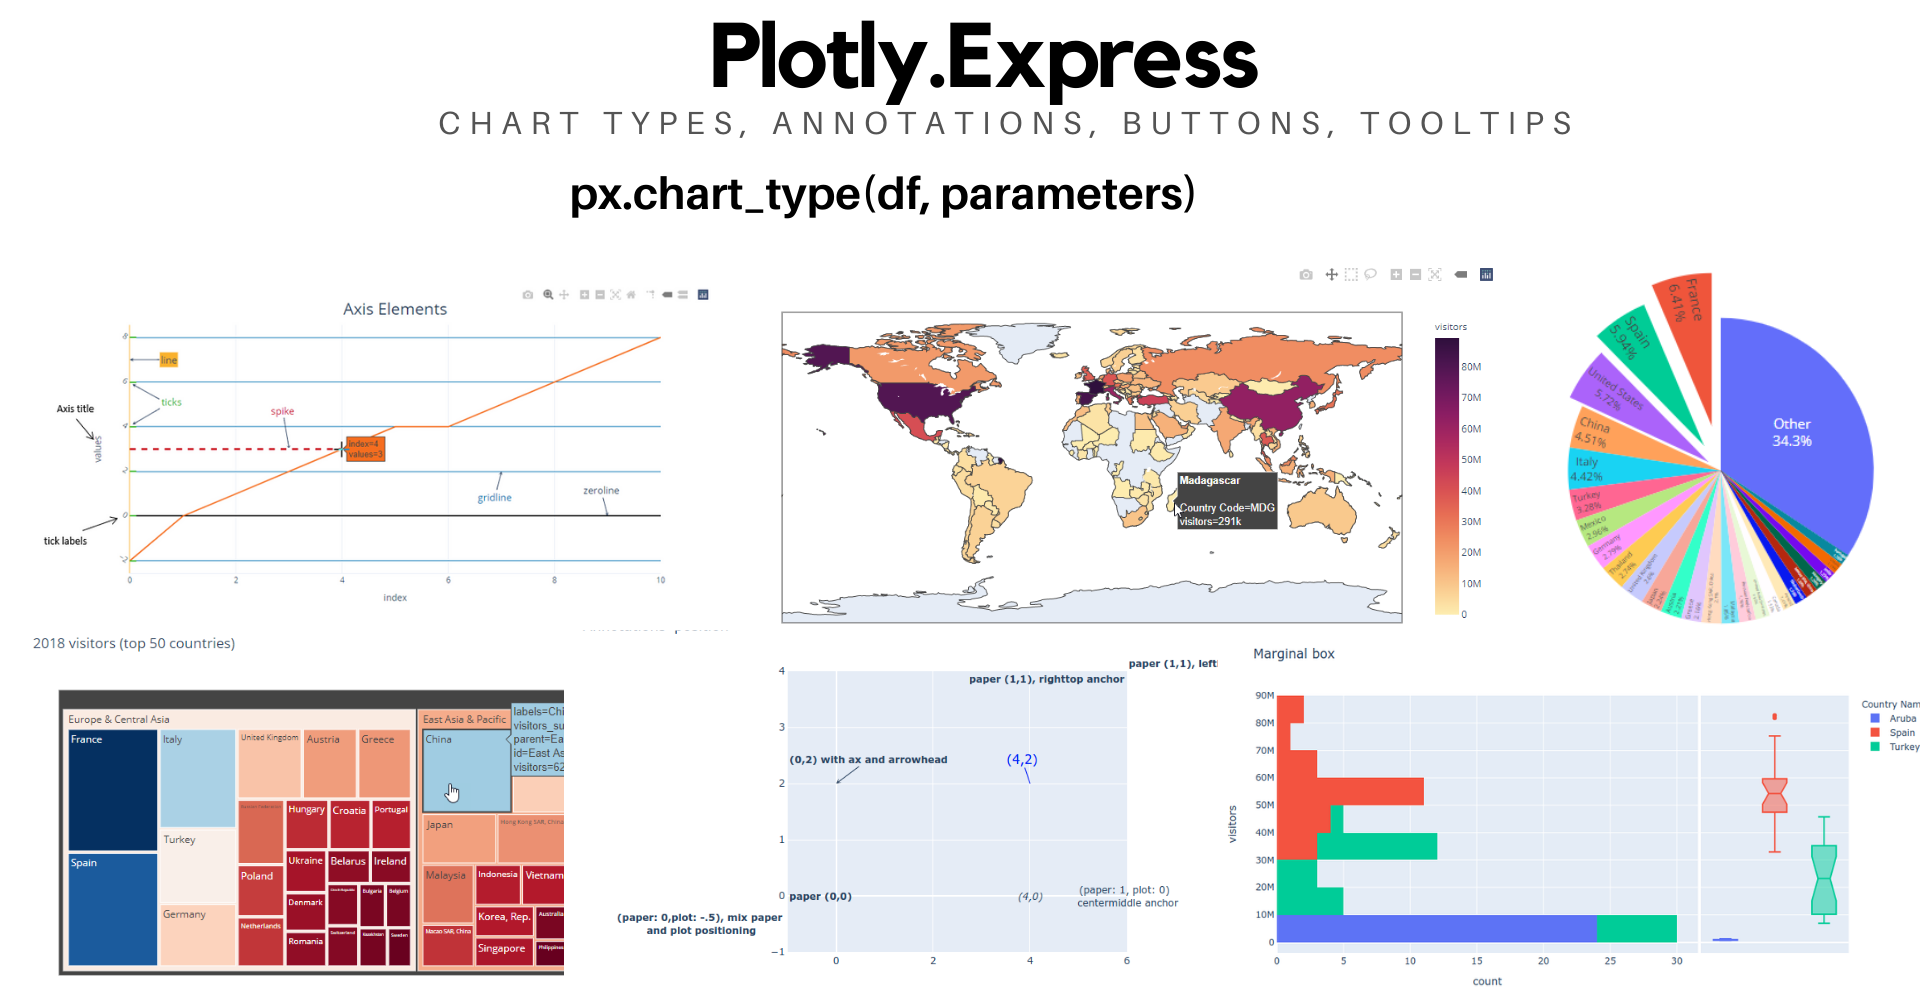<div>
<img src="attachment:176fce27-fe91-416f-8a1e-061904349617.png" width="800"/>
</div>

Se pide que represente de nuevo la información que se proporciona en los notebook haciendo uso de esta librería, incluyendo los mismos y/o nuevos gráficos que incluyan los datos del dataset de manera general (por ejemplo un gráfico de países con colores según el valor), y proporcione otros nuevos gráficos que resuelvan diferentes cuestiones importantes que crea que son de interés para mostrar mediante el análisis ya realizado. Por ejemplo, se plantean algunas cuestiones de ejemplo (se propone que el alumno genere otra serie de preguntas (al menos 8-10) en base al análisis realizado de los Notebooks) y haga las representaciones oportunas:

1. ¿Cuántos casos por cada 100 mil habitantes hay en los países europeos en el año 2000 para la enfermedad de la TB? ¿Y en los asiáticos?
2. ¿Qué países tienen el mayor número de casos existentes y nuevos de TB en un año concreto?
3. ¿Cuáles son los países con la mayor incidencia de la enfermedad de la TB4?
4. Después de aplicar el Análisis de Componentes Principales (PCA) y trazar los resultados, ¿qué sucede con Zimbabwe en el gráfico? Si es interesante, ¿se puede visualizar esto de una mejor manera?
5. Cuando agrupas los resultados del PCA, ¿es una buena selección 5 grupos para estos datos? ¿Cómo se debería representar esto?

Finalmente una vez haya creado las representaciones se le propone que introduzca algún gráfico avanzado. Realice al menos dos de ellos, tome como ejemplos los vistos en el Tema 2 sobre infografías.

En primer lugar, definimos los DataFrames que encontramos en el ejemplo de EDA proporcionado. Cabe destacar que hemos renombrado ciertos países, puesto que luego sino no aparecían en ciertas representaciones. Visualizamos uno de ellos, para ver que forma tiene.



In [ ]:
local_tb_deaths_file = main_datasets_path+'EDA_Tuberculosis/tb_deaths_100.csv'
local_tb_existing_file = main_datasets_path+'EDA_Tuberculosis/tb_existing_100.csv'
local_tb_new_file = main_datasets_path+'EDA_Tuberculosis/tb_new_100.csv'

deaths_df = pd.read_csv(local_tb_deaths_file, index_col = 0, thousands  = ',').T
existing_df = pd.read_csv(local_tb_existing_file, index_col = 0, thousands  = ',').T
new_df = pd.read_csv(local_tb_new_file, index_col = 0, thousands  = ',').T
existing_df = existing_df.rename(columns={'Czech Republic': 'Czechia', 'Macedonia, FYR': 'North Macedonia',
                                          'Russian Federation': 'Russia', 'Korea, Rep.': 'South Korea',
                                          'Korea, Dem. Rep.': 'North Korea', 'Syrian Arab Republic': 'Syria',
                                          'Timor-Leste': 'East Timor', 'Viet Nam': 'Vietnam',
                                          'Brunei Darussalam': 'Brunei'
                                          })

new_df = new_df.rename(columns={'Czech Republic': 'Czechia', 'Macedonia, FYR': 'North Macedonia',
                                          'Russian Federation': 'Russia', 'Korea, Rep.': 'South Korea',
                                          'Korea, Dem. Rep.': 'North Korea', 'Syrian Arab Republic': 'Syria',
                                          'Timor-Leste': 'East Timor', 'Viet Nam': 'Vietnam',
                                          'Brunei Darussalam': 'Brunei'})

deaths_df = deaths_df.rename(columns={'Czech Republic': 'Czechia', 'Macedonia, FYR': 'North Macedonia',
                                          'Russian Federation': 'Russia', 'Korea, Rep.': 'South Korea',
                                          'Korea, Dem. Rep.': 'North Korea', 'Syrian Arab Republic': 'Syria',
                                          'Timor-Leste': 'East Timor', 'Viet Nam': 'Vietnam',
                                          'Brunei Darussalam': 'Brunei'})


df_2000 = existing_df.loc["2000"]
df_summary = existing_df.describe()
existing_df

## **¿Cuántos casos por cada 100 mil habitantes hay en los países europeos en el año 2000 para la enfermedad de la TB? ¿Y en los asiáticos?**





Para visualizar dicha información, hemos decidido diseñar dos mapas, uno para cada continente, en los cuáles se puede observar con una escala de color, cuantos casos existentes había en cada país en el año 2000. Importante recalcar, que los huecos en los mapas se deben a que ciertos países no existían como tal en el año 2000 (Kosovo era parte de Serbia y Serbia estaba fusionada a Montenegro, por ejemplo) y que los valores son casos por cada 100.000 habitantes.


In [ ]:
world = gpd.read_file(
    "/content/drive/MyDrive/ne_110m_admin_0_countries.shp")
europe = world[world['CONTINENT'] == 'Europe']
data_europe = europe.merge(df_2000, how='left',
                    left_on='NAME', right_on='TB prevalence, all forms (per 100 000 population per year)')
data_europe.dropna(subset=['2000'], inplace=True)

# initialize the figure
fig, ax = plt.subplots(figsize=(15, 10))

# define colors
cmap = cm.Greens
min_rate, max_rate = 2, 12
norm = colors.Normalize(vmin=0, vmax=140)

# create the plot
data_europe.plot(column='2000', cmap=cmap, norm=norm,
          edgecolor='black', linewidth=0.4, ax=ax)

# custom axis
ax.set_xlim(-24.5, 40)
ax.set_ylim(32, 72)
ax.axis('off')

# add a title
year = 2019
wave = 8
fig.text(0.2, 0.95, 'Tuberculosis cases per 100.000 people',
         fontsize=22, fontweight='bold', fontfamily='serif')

# add credit source at the bottom
text = "<Design>: Joseph Barbier"
fig_text(0.7, 0.08,
         s=text,
         color='black',
         fontsize=9,
         highlight_textprops=[{"fontweight": 'bold'}],
         ax=ax)

# bloc of text on the bottom
fig.text(0.35, 0.14, 'No data for Serbia, Montenegro\n and Kosovo (These countries did\n not exist at the time)',
         fontsize=10,
         fontweight='ultralight',
         verticalalignment='center',
         fontfamily='DejaVu Sans')
style = "Simple, tail_width=0.5, head_width=4, head_length=8"
kw = dict(arrowstyle=style, color="k")
tail_position = (0.48, 0.12)
head_position = (0.62, 0.32)
a = patches.FancyArrowPatch(tail_position, head_position,
                            connectionstyle="arc3,rad=.5",
                            transform=fig.transFigure,
                            **kw)
plt.gca().add_patch(a)


# compute centroids for annotations
data_projected = data_europe.to_crs(epsg=3035)
data_projected['centroid'] = data_projected.geometry.centroid
data_europe['centroid'] = data_projected['centroid'].to_crs(data_europe.crs)
countries_to_annotate = list(data_europe["SOVEREIGNT"])
exceptions = ['Luxembourg', 'Slovenia', 'North Macedonia', 'Albania']
adjustments = {
    'Russia': (-60,-10),
    'Norway': (-4.5,-6),
    'Belarus': (0,0),
    'Ukraine': (0,0),
    'Moldova': (0,0),
    'Albania': (-0.15,-1),
    'Iceland': (0,-0.7),
    'North Macedonia': (0.2,-0.3),
    'Bosnia and Herzegovina': (0,0),
    'France': (9, 3),
    'Italy': (-2.4, 2),
    'Lithuania': (0, -0.6),
    'Finland': (0, -2.5),
    'Romania': (0, -0.5),
    'Bulgaria': (0, -0.6),
    'Greece': (-1.2, -0.8),
    'Croatia': (0, 0),
    'Cyprus': (0, -1),
    'Ireland': (-0.4, -1),
    'Malta': (0, -1),
    'Slovenia': (-0.3, -0.6),
    'Slovakia': (-0.7, -0.6),
    'Estonia': (-0.2, -0.7),
    'Latvia': (0, -0.5),
    'Belgium': (0, -0.7),
    'Austria': (0, -1),
    'Spain': (0, -1),
    'Portugal': (-0.5, -1),
    'Luxembourg': (0, -1),
    'Germany': (-0.2, 0),
    'Hungary': (-0.3, -0.7),
    'Czechia': (0, -0.5),
    'Poland': (0, -1),
    'Sweden': (-1.5, -1),
    'Denmark': (0, -1),
    'Netherlands': (0, 0),
    'United Kingdom': (0, -2.5),
    'Switzerland': (0, -0.5),
}
# annotate countries
for country in countries_to_annotate:

    # get centroid
    centroid = data_europe.loc[data_europe['NAME'] == country, 'centroid'].values[0]
    x, y = centroid.coords[0]

    # get corrections
    x += adjustments[country][0]
    y += adjustments[country][1]

    # get rate and annotate
    if country not in exceptions:
      rate = data_europe.loc[data_europe['NAME'] == country, '2000'].values[0]
      ax.annotate(f'{country[:3]} {rate}', (x, y), textcoords="offset points", xytext=(5, 5),
                  ha='center', fontsize=8, fontfamily='DejaVu Sans', color='black')

# display the plot
plt.tight_layout()
plt.show()

Observamos que en general los paises del Oeste presentan una incidencia significativamente menor que los del Este (Probablemente por una mayor calidad de los sistemas sanitarios), siendo Moldavia con 215 casos por cada 100.000 habitantes el mayor afectado.

Por otra parte, los países norteños como Suecia o Noruega tienen mejores números que los sureños como España o Portugal (¿Puede ser que la enfermedad se propague peor en ambientes fríos?). Procedemos con el continente Asiático

In [ ]:
world = gpd.read_file(
    "/content/drive/MyDrive/ne_110m_admin_0_countries.shp")
asia = world[world['CONTINENT'] == 'Asia']
data_asia = asia.merge(df_2000, how='left',
                    left_on='NAME', right_on='TB prevalence, all forms (per 100 000 population per year)')
data_asia.dropna(subset=['2000'], inplace=True)

# initialize the figure
fig, ax = plt.subplots(figsize=(15, 10))

# define colors
cmap = cm.Greens
min_rate, max_rate = 2, 12
norm = colors.Normalize(vmin=0, vmax=650)

# create the plot
data_asia.plot(column='2000', cmap=cmap, norm=norm,
          edgecolor='black', linewidth=0.4, ax=ax)

# custom axis
ax.set_xlim(30, 150)
ax.set_ylim(-15, 60)
ax.axis('off')

# add a title
year = 2019
wave = 8
fig.text(0.2, 0.95, 'Tuberculosis cases per 100.000 people',
         fontsize=22, fontweight='bold', fontfamily='serif')

# bloc of text on the bottom
fig.text(0.2, 0.14, 'Cambodia with 758 cases per 100.000 people is the worst\n affected country in Asia',
         fontsize=10,
         fontweight='ultralight',
         verticalalignment='center',
         fontfamily='DejaVu Sans')
style = "Simple, tail_width=0.5, head_width=4, head_length=8"
kw = dict(arrowstyle=style, color="k")
tail_position = (0.48, 0.12)
head_position = (0.62, 0.39)
a = patches.FancyArrowPatch(tail_position, head_position,
                            connectionstyle="arc3,rad=.5",
                            transform=fig.transFigure,
                            **kw)
plt.gca().add_patch(a)

# compute centroids for annotations
data_projected = data_asia.to_crs(epsg=3035)
data_projected['centroid'] = data_projected.geometry.centroid
data_asia['centroid'] = data_projected['centroid'].to_crs(data_asia.crs)
countries_to_annotate = list(data_asia["SOVEREIGNT"])
exceptions = ['Israel', 'Lebanon', 'United Arab Emirates', 'Qatar', 'Bahrain', 'Kuwait',
              'East Timor', 'Brunei', 'Bhutan', 'Georgia', 'Armenia', 'Azerbaijan', 'Cyprus',
              'Jordan', 'Sri Lanka', 'Laos', 'Nepal', 'Bangladesh', 'Cambodia']
adjustments = {
  'Kazakhstan':(0,-1),
  'Uzbekistan':(0,-1),
  'Indonesia':(-3,-1.6),
  'East Timor':(0,0),
  'Israel':(0,0),
  'Lebanon':(0,0),
  'Israel':(0,0),
  'Jordan':(0,0),
  'United Arab Emirates':(0,0),
  'Qatar':(0,0),
  'Kuwait':(0,0),
  'Iraq':(-1,-1),
  'Oman':(0,0),
  'Cambodia':(0,-6),
  'Thailand':(0.3,0),
  'Laos':(0,0),
  'Myanmar':(0,-0.7),
  'Vietnam':(3.5,0),
  'North Korea':(4.25,-1),
  'South Korea':(4,0),
  'Mongolia':(0,0),
  'India':(0,0),
  'Bangladesh':(0,0),
  'Bhutan':(0,-1),
  'Nepal':(0,-1),
  'Pakistan':(0,-1),
  'Afghanistan':(0,0),
  'Tajikistan':(0,-1),
  'Kyrgyzstan':(0,-1),
  'Turkmenistan':(0,-1),
  'Iran':(0,0),
  'Syria':(0,0),
  'Armenia':(0,0),
  'Turkey':(0,0),
  'Sri Lanka':(0,0),
  'China':(0,-5.5),
  'Taiwan':(0,0),
  'Azerbaijan':(0,0),
  'Georgia':(0,0),
  'Philippines':(4.3,0.5),
  'Malaysia':(0,0),
  'Brunei':(0,0),
  'Japan':(0,-3.2),
  'Yemen':(-0.5,-0.8),
  'Saudi Arabia':(0,0),
  'Northern Cyprus':(0,0),
  'Cyprus':(0,0),
}
# annotate countries
for country in countries_to_annotate:

    # get centroid
    centroid = data_asia.loc[data_asia['NAME'] == country, 'centroid'].values[0]
    x, y = centroid.coords[0]

    # get corrections
    x += adjustments[country][0]
    y += adjustments[country][1]

    # get rate and annotate
    if country not in exceptions:
      rate = data_asia.loc[data_asia['NAME'] == country, '2000'].values[0]
      ax.annotate(f'{country[:3]} {rate}', (x, y), textcoords="offset points", xytext=(5, 5),
                  ha='center', fontsize=9, fontfamily='DejaVu Sans', color='black')

# display the plot
plt.tight_layout()
plt.show()

En primer lugar, debemos destacar que la tuberculosis afectó en una escala mucho mayor a Asia, de lo que lo hizo a Europa. El país con peores resultados fue Camboya, con un 0.758% de su población infectada.

 Otros países como Filipinas, India, Pakistan o Indonesia, también presentaron cifras alarmantes, confirmándose así que una alta densidad de población afecta directamente al número de casos. Destaca la diferencia entre las dos mitades de la península de Corea, sin embargo, muy probablemnte se deba a la situación política y social existente en el norte.

## **¿Qué países tienen el mayor número de casos existentes y nuevos de TB en un año concreto?**

En primer lugar, imprimimos aquellos países que lideraron la clasificación de casos existentes, por cada año.

In [ ]:
for i in existing_df.index:
  posicion = 1
  x = existing_df.loc[i]
  print(i, ':', x.idxmax(), x.max(), '###',posicion)
  for j in range(4):
    posicion += 1
    x[x.idxmax()] = 0
    print(i, ':', x.idxmax(), x.max(), '###',posicion)

existing_df = pd.read_csv(local_tb_existing_file, index_col = 0, thousands  = ',').T
existing_df = existing_df.rename(columns={'Czech Republic': 'Czechia', 'Macedonia, FYR': 'North Macedonia',
                                          'Russian Federation': 'Russia', 'Korea, Rep.': 'South Korea',
                                          'Korea, Dem. Rep.': 'North Korea', 'Syrian Arab Republic': 'Syria',
                                          'Timor-Leste': 'East Timor', 'Viet Nam': 'Vietnam',
                                          'Brunei Darussalam': 'Brunei'})

Observamos que muchos resultados se repiten (Djibouti, Kiribati, Cambodia...). Representamos en una simple gráfica todos ellos.

In [ ]:
existing_df[["Djibouti", "Kiribati", "North Korea", "Bhutan", "Cambodia", "Philippines", "East Timor",
             "Zambia", "Swaziland", "Sierra Leone", "Togo", "Congo, Dem. Rep."]].plot(grid=True).legend(
    loc='center left',
    bbox_to_anchor=(1, 0.5))

Sin embargo, esta representación, aunque útil es muy poco visual, ya que hay demasiadas líneas que se entrecruzan. Probamos a representar con Plotly en una mapa interactivo en el que se observa la evolución por años. Para ello, debemos reorganizar nuestros datos.

In [ ]:
copy_df = existing_df
countries = list(copy_df.columns)
data = []
contador = 0

for year in list(copy_df.index):
  contador_2 = 0
  for pais in list(copy_df.columns):
    data.append([year, pais, copy_df.values[contador][contador_2]])
    contador_2+=1
  contador+=1


pivoted_existing_df = pd.DataFrame(columns = ["year", "country", "value"], data = data)
pivoted_existing_df

In [ ]:
fig = px.scatter_geo(pivoted_existing_df, locations = "country",
                     locationmode = "country names",
                     hover_name="country",
                     size = "value",
                     animation_frame="year",
                     projection="natural earth")
fig.show()

Así pues, vemos que el continente peor afectado es de lejos Africa (ya lo imaginábamos, al ser su sistema sanitario el menos desarrollado).

También, cifras alarmantes en el sureste asiático y Oceanía, aunque aquí algunos datos pueden inducir a error. Kiribati, que es uno de los países que presentan peores cifras, es un archipiélago (scatter_geo no lo representa) con poco más de 100.000 habitantes, por lo tanto, el número de casos en términos absolutos no es muy grande.

Ahora realizamos el mismo proceso para los casos nuevos, obteniendo resultados predeciblemente similares (tan solo destacar el caso especial de Suazilandia, cuyos casos nuevos se dispararon a partir de alrededor 1995)

In [ ]:
for i in existing_df.index:
  posicion = 1
  x = existing_df.loc[i]
  print(i, ':', x.idxmax(), x.max(), '###',posicion)
  for j in range(4):
    posicion += 1
    x[x.idxmax()] = 0
    print(i, ':', x.idxmax(), x.max(), '###',posicion)

new_df = pd.read_csv(local_tb_new_file, index_col = 0, thousands  = ',').T
new_df = new_df.rename(columns={'Czech Republic': 'Czechia', 'Macedonia, FYR': 'North Macedonia',
                                          'Russian Federation': 'Russia', 'Korea, Rep.': 'South Korea',
                                          'Korea, Dem. Rep.': 'North Korea', 'Syrian Arab Republic': 'Syria',
                                          'Timor-Leste': 'East Timor', 'Viet Nam': 'Vietnam',
                                          'Brunei Darussalam': 'Brunei'})

In [ ]:
new_df[["Djibouti", "Kiribati", "North Korea", "Bhutan", "Cambodia", "Philippines", "East Timor",
             "Zambia", "Swaziland", "Sierra Leone", "Togo", "Congo, Dem. Rep."]].plot(grid=True).legend(
    loc='center left',
    bbox_to_anchor=(1, 0.5))

In [ ]:
copy_df = new_df
countries = list(copy_df.columns)
data = []
contador = 0

for year in list(copy_df.index):
  contador_2 = 0
  for pais in list(copy_df.columns):
    data.append([year, pais, copy_df.values[contador][contador_2]])
    contador_2+=1
  contador+=1


pivoted_df = pd.DataFrame(columns = ["year", "country", "value"], data = data)
pivoted_df = pivoted_df.fillna(0)

fig = px.scatter_geo(pivoted_df, locations = "country",
                     locationmode = "country names",
                     hover_name="country",
                     size = "value",
                     animation_frame="year",
                     projection="natural earth")
fig.show()

## **¿Cómo evolucionan los casos existentes, nuevos y las muertes globalmente en función del tiempo?**

Fusionamos los tres DataFrames en uno solo y visualizamos los valores totales, por año.


In [ ]:
deaths_total_per_year_df = deaths_df.sum(axis=1)
existing_total_per_year_df = existing_df.sum(axis=1)
new_total_per_year_df = new_df.sum(axis=1)

world_trends_df = pd.DataFrame({
           'Total deaths per 100K' : deaths_total_per_year_df,
           'Total existing cases per 100K' : existing_total_per_year_df,
           'Total new cases per 100K' : new_total_per_year_df},
       index=deaths_total_per_year_df.index)

world_trends_df.plot(figsize=(12,6), grid=True).legend(
    loc='center left',
    bbox_to_anchor=(1, 0.5))

En la gráfica observamos que el total de casos existentes desciende desde 1990, con algún que otro bache, pero con la tendencia descendente clara.


En cuanto a los casos nuevos estos mantienen una tendencia ascendente hasta el año 2002, en el cual comienza a invertirse dicha tendencia.


El hecho de que suba el número de nuevos casos, pero baje el de existentes, puede resultar extraño, no obstante, tiene 2 posibles explicaciones La primera podría ser que la enfermedad fuera extremadamente letal, lo cual incidiría en el número existente de casos (se observa claramente que no es el caso, puesto que las muertes son relativamente bajas).

Pero, en realidad lo que ocurre es que al principio del siglo XXI se avanzó notablemente en los tratamientos de esta enfermedad, por lo que, aún cuando había más contagios, la gente superaba la enfermedad más fácilmente.


## **¿Cúal es la tasa de mortalidad en cada país? ¿Existen diferencias notables entre continentes? ¿A qué se deben?**


Como en la anterior pregunta el diseño de la gráfica no permitía observar adecuadamente la evolución del número de muertes, graficamos individualmente las mismas.

In [ ]:
world_trends_df['Total deaths per 100K'].plot(figsize=(12,6), grid=True).legend(
    loc='center left',
    bbox_to_anchor=(1, 0.5))

Observamos que el número de muertes por cada 100.000 habitantes mantiene una tendencia ascendente, hasta el 2002, tal y como ocurría en el caso del número de nuevos casos.

Por lo tanto, todo correcto, el encontrar nuevos tratamientos que curen la enfermedad, impacta en el número de muertes por la misma, reduciéndolo. Sin embargo, parece que sigue muriendo mucha gente, representemos la tasa de mortalidad en un mapa mundial, para observar las diferencias entre países y continentes.

In [ ]:
mortality_df = deaths_df/(existing_df+deaths_df)

copy_df = mortality_df
countries = list(copy_df.columns)
data = []
contador = 0

for year in list(copy_df.index):
  contador_2 = 0
  for pais in list(copy_df.columns):
    data.append([year, pais, copy_df.values[contador][contador_2]])
    contador_2+=1
  contador+=1


pivoted_df = pd.DataFrame(columns = ["year", "country", "value"], data = data)
pivoted_df = pivoted_df.fillna(0)

fig = px.choropleth(pivoted_df, locations = "country",
                    locationmode = "country names",
                    color = "value",
                    animation_frame="year",
                    projection="natural earth",
                    color_continuous_scale=px.colors.sequential.deep)
fig.show()

Tras esta representación, queda claro que en el continente africano la tuberculosis fue y probablemente sigue siendo un gran problema. Especialmente, en el sur, en países como Zambia, Sudáfrica, Uganda o Zimbabwe es donde encontaramos los valores más preocupantes, llegando prácticamente al 30% de mortalidad en algún año.

Por otra parte, el sudeste asiático, que anteriormente aparecía como una de las zonas con mayor incidencia, presenta una mortalidad inferior al 16% en todo momento. (Los valores de mortalidad igual a 1 se deben a errores en el cálculo o a que el país en cuestión no registró sus datos de casos existentes)

Finalmente, analizamos el norte de Europa y de América, debido a que en esta zona vemos que los valores de mortalidad cambian muy bruscamente dependiendo del año. Una explicación plausible para esto es que al ser de los países con menor número de casos existentes, un número bajo de muertes, puede causar que el valor de mortalidad suba bastante. Por ejemplo, mediante un simple print, vemos que para Suecia el número de muertes por cada 100.000 habitantes varía en los 17 años entre 0 y 1, por lo tanto, aún cuando los valores de mortalidad son altos, el número de muertes es muy bajo.

## **En cifras absolutas de población, ¿cuáles son los países con mayor número de casos existentes?**

Ahora bien, todo lo que hemos estado hablando hasta el momento ha sido en cifras realtivas (por cada 100.000 habitantes), así que creemos interesante realizar un análisis con cifras absolutas. Para ello, nos hemos descargado una base de datos con la población mundial año por año, la cual hemos procesado tanto manualmente como mediante comandos de python, para que se adapte a nuestras necesidades (sin alterar los datos en sí).

In [ ]:
mundial = pd.read_csv("/content/drive/MyDrive/API_SP.POP.TOTL_DS2_en_csv_v2_84032 - API_SP.POP.TOTL_DS2_en_csv_v2_84033.csv", header = 4)
mundial = mundial.drop(columns = ["Indicator Name", "Indicator Code", "Country Code"]).rename(columns = {"Country Name": "Country"})[["Country", "1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999",
                                                                                                                                      "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007"]].set_index("Country").drop(["World", "Montenegro", "Liechtenstein"])
mundial

Preparamos el existing_df para la fusión.

In [ ]:
lista_valores = []

for year in list(mundial.columns):
  for i in list(mundial[year]):
    lista_valores.append(i)

copy_df = existing_df
countries = list(copy_df.columns)
data = []
contador = 0

for year in list(copy_df.index):
  contador_2 = 0
  for pais in list(copy_df.columns):
    data.append([year, pais, copy_df.values[contador][contador_2]])
    contador_2+=1
  contador+=1

pivoted_existing_df = pd.DataFrame(columns = ["year", "country", "value"], data = data)
pivoted_existing_df = pivoted_existing_df.set_index("country").drop(["Anguilla", "Cook Islands", "Montserrat", "Netherlands Antilles", "Tokelau", "Wallis et Futuna", "British Virgin Islands", "Niue"]).reset_index()
pivoted_existing_df["country"] = pivoted_existing_df["country"].astype('str')
pivoted_existing_df

Ahora, fusionamos los datos de la tuberculosis con los datos de poblacion (antes hemos ordenado alfabeticamente los países y comparado uno a uno que estén emparejados correctamente).

In [ ]:
absolute_df = pivoted_existing_df
absolute_df["value"] =  absolute_df["value"]*lista_valores/100000
absolute_1990 = pivoted_existing_df[pivoted_existing_df["year"]=="1990"]

Visualizamos los datos en un gráfico de dispersión, el cual nos permite ver la distribución de los mismos de una forma rápida y sencilla. Previsiblemente, los dos países con mayor número de casos son India y China (Los dos con mayor población). Es más, entre ellos dos presentan aproximadamente la mitad de los casos a nivel mundial año tras año.

In [ ]:
fig = px.scatter(absolute_df, x="year", y="value", color="country"
                 )
fig.show()

Bien, vamos a eliminar a India y a China de la ecuación, para observar mejor el resto de países.

In [ ]:
absolute_df_2 = absolute_df[absolute_df.country != "China"]
absolute_df_2 = absolute_df_2[absolute_df_2.country != "India"]
fig = px.scatter(absolute_df_2, x="year", y="value", color="country"
                 )
fig.show()

Y bien, podemos observar más información interesante. Por ejemplo, en 1997 y 1998 Filipinas no presentó datos, puesto que desaparecen completamente del gráfico. Asimismo, los Estados Unidos, aún siendo el tercer país más poblado de la  Tierra, no aparecen entre los que cuentan un mayor número de infectados.

Finalmente, destacar la tendencia contraria entre Asia y Africa. Si nos fijamos en los países que lideran la clasificación en 1990, estos son en su mayoría asiáticos (Indonesia, Bangladesh, Pakistan...), sin embargo a partir del año 2000 todos ellos presentan una tendencia descendente. Por otro lado, los africanos como Nigeria, Congo o Ethiopa, ven como las cifras siguen una tendencia ascendente, incluso en el año 2007.


## **Sabemos que la tendencia de casos es descendente a partir del año 2000 para la mayoría de los países, pero ¿significa eso que el número total de enfermos desciende?**

Agrupamos los datos por año y seleccionamos la suma de todos los países. Observamos, que efectivamente el número total de casos desciende, lentamente de 1996 al 2002 y más abruptamente hasta el 2007 (Coincidiendo con la reducción de casos existentes en India y China)

In [ ]:
absolute_df.groupby("year").sum("value")

## **¿Cúal es el número total de muertos en España por tuberculosis entre 1990 y 2007?**

In [ ]:
lista_valores = []

for year in list(mundial.columns):
  for i in list(mundial[year]):
    lista_valores.append(i)

copy_df = deaths_df
countries = list(copy_df.columns)
data = []
contador = 0

for year in list(copy_df.index):
  contador_2 = 0
  for pais in list(copy_df.columns):
    data.append([year, pais, copy_df.values[contador][contador_2]])
    contador_2+=1
  contador+=1

pivoted_deaths_df = pd.DataFrame(columns = ["year", "country", "value"], data = data)
pivoted_deaths_df = pivoted_deaths_df.set_index("country").drop(["Anguilla", "Cook Islands", "Montserrat", "Netherlands Antilles", "Tokelau", "Wallis et Futuna", "British Virgin Islands", "Niue"]).reset_index()
pivoted_deaths_df["country"] = pivoted_deaths_df["country"].astype('str')
absolute_deaths_df = pivoted_deaths_df
absolute_deaths_df["value"] =  absolute_deaths_df["value"]*lista_valores/100000
spain_deaths = absolute_deaths_df[absolute_deaths_df["country"] == "Spain"]
fig = px.line(spain_deaths, x="year", y="value")
fig.show()

Por lo tanto, podemos ver que cada año muere menos gente por tuberculosis en nuestro país, aunque parece haber una ligera tendencia ascendente en los últimos años (tendencia que no se mantuvo, puesto que a día de hoy la cifra de muertos por tuberculosis en España no alcanza ni los 500 fallecidos).

El número total de fallecidos en el intervalo (1990-2007) fue de 29227 aproximadamente.


In [ ]:
spain_deaths["value"].sum()